<a href="https://colab.research.google.com/github/jjdevhub/mlops-fastcampus/blob/main/CH02_02_PyTorch_%EA%B8%B0%EB%B3%B8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

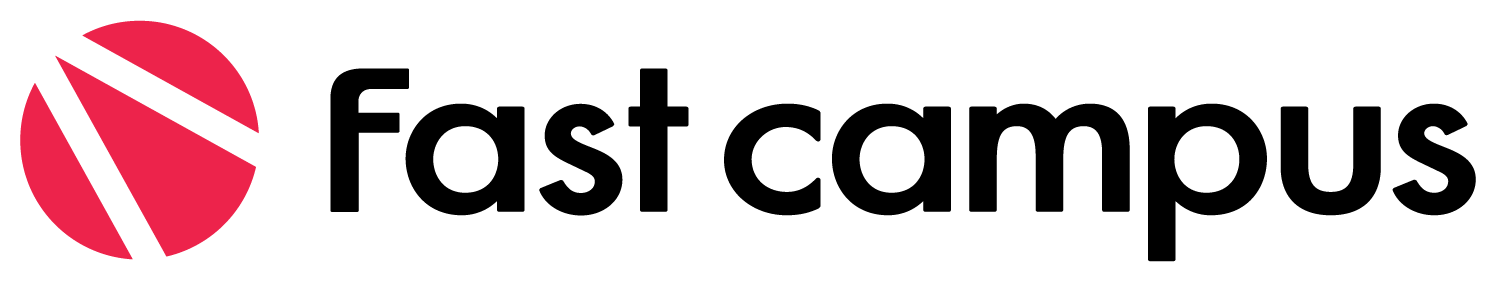

## 백엔드 개발자를 위한 MLOps

### 2.2 PyTorch 기본 실습

PyTorch의 핵심 데이터 구조인 Tensor 조작 및 nn.Module 이해.

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=1fe4794f0a883d46695b5f8bc3d0e7cc16ddc2287f9d0f1b7cd7ba823317ee07
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
from torchviz import make_dot
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

# 덧셈
z = x + y
print(z)  # tensor([5, 7, 9])

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


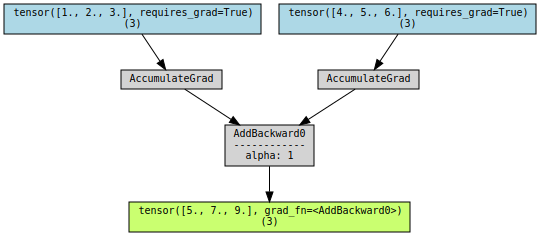

In [ ]:
make_dot(z, params={x: x, y: y, z: z}, show_attrs=True, show_saved=True)

In [ ]:
s = z.sum()

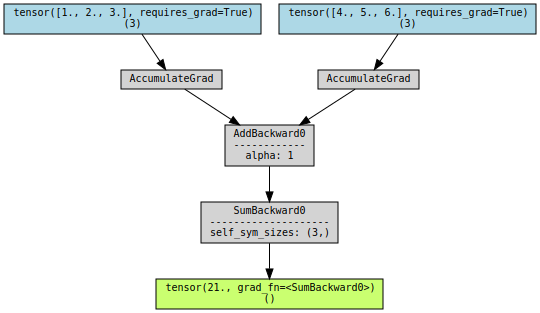

In [ ]:
make_dot(s, params={x: x, y: y, z: z, s: s}, show_attrs=True, show_saved=True)

In [ ]:
s.backward()

예시 1: 텐서 생성

In [ ]:
# 0으로 채워진 텐서
x = torch.zeros(2, 3)
print(x)

# 1로 채워진 텐서
y = torch.ones(2, 3)
print(y)

# 특정 값을 기준으로 텐서 생성
z = torch.tensor([[1, 2], [3, 4]])
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 2],
        [3, 4]])


예시 2: 텐서 타입 및 크기 확인

In [ ]:
x = torch.rand(2, 3, 4)
print(x.dtype)    # torch.float32 (기본 데이터 타입)
print(x.size())   # torch.Size([2, 3, 4])

torch.float32
torch.Size([2, 3, 4])


In [ ]:
x

tensor([[[0.8435, 0.3872, 0.7462, 0.6253],
         [0.4566, 0.8980, 0.5170, 0.9653],
         [0.1864, 0.0300, 0.3274, 0.0900]],

        [[0.4587, 0.6264, 0.9108, 0.3274],
         [0.4197, 0.5369, 0.4693, 0.8535],
         [0.2582, 0.5120, 0.3770, 0.3037]]])

예시 3: 텐서 변환 (reshape)

In [ ]:
x = torch.rand(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # -1은 차원을 추론하여 자동 계산한다는 의미

print(y.size())    # torch.Size([16])
print(z.size())    # torch.Size([2, 8])

torch.Size([16])
torch.Size([2, 8])


예시 4: 텐서 연결 (concatenation)

In [ ]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6]])
c = torch.cat([a, b], dim=0) # dim=0은 행을 기준으로 병합
print(c)
print(c.size())

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


5. 예시 5: 차원 추가 및 제거

In [ ]:
x = torch.tensor([1, 2, 3, 4])
x1 = x.unsqueeze(0)    # 차원 추가
x2 = x1.squeeze(0)     # 차원 제거
print(x1)
print(x1.size())
print(x2)
print(x2.size())

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([1, 2, 3, 4])
torch.Size([4])


예시 6. 텐서 인덱싱 및 슬라이싱

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)          # 텐서 원본
print(x[0, :])    # 첫 번째 행 전체
print(x[:, 1])    # 두 번째 열 전체
print(x[1:, 1:])  # 첫 번째 행 이후의 각 행의, 첫 번째 열 이후의 각 열

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor([2, 5, 8])
tensor([[5, 6],
        [8, 9]])


예시 7. 텐서 분리 (splitting)

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a, b = torch.split(x, 2, dim=0)  # 행 기준으로, 2개씩 분리
print(x) # 텐서 원본
print(a)
print(b)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ 7,  8,  9],
        [10, 11, 12]])


예시 8: 텐서 전치 (transpose)

In [ ]:
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(x)
print(x.transpose(0, 1))  # 0번째와 1번째 차원을 전치

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 3, 5],
        [2, 4, 6]])


## nn.Module

`nn.Module`은 PyTorch의 신경망 구성을 위한 레이어 혹은 모델을 위한 클래스

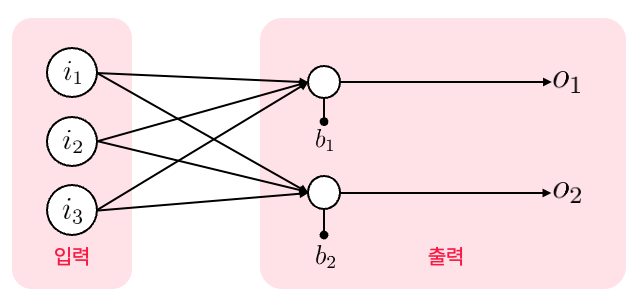

In [ ]:
class LinearModule(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

In [ ]:
model = LinearModule(3, 2)
x = torch.randn(10, 3)
output = model(x)
output

tensor([[ 0.7339, -1.1760],
        [ 0.2375,  0.5862],
        [ 0.2036, -0.6601],
        [ 1.2191,  0.8290],
        [-0.7398, -0.6001],
        [ 0.0822, -0.1030],
        [-0.2233,  1.2824],
        [ 0.5252,  0.8634],
        [-0.2971,  0.8739],
        [ 0.4209,  0.2523]], grad_fn=<AddmmBackward0>)

## 실습: XOR 예측 문제

XOR 게이트 입력 매개변수 A, B를 주었을 때 출력 Y(A⊕B)를 계산하는 모델을 학습 및 구성.

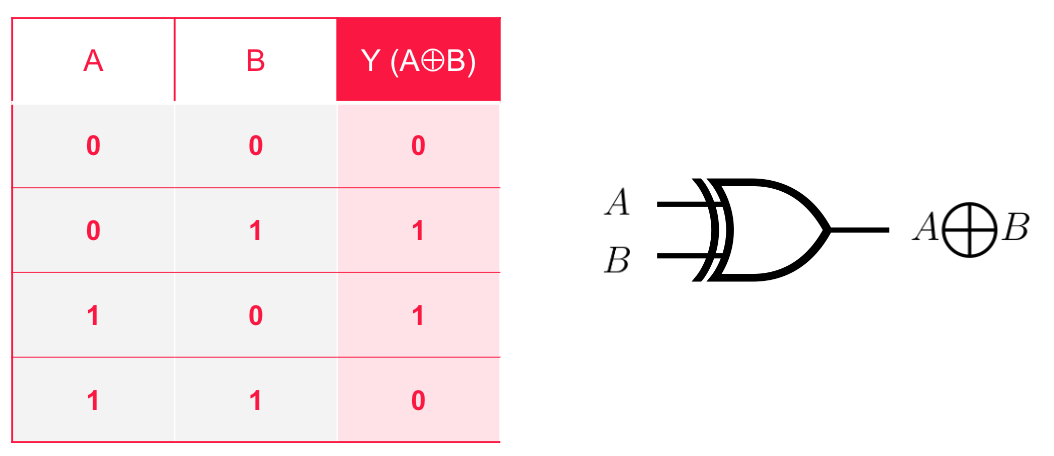

In [ ]:
# XOR 연산을 위한 신경망 모델 정의
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2)  # 입력 2개, 출력 2개
        self.layer2 = nn.Linear(2, 1)  # 입력 2개, 출력 1개
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

In [ ]:
# 데이터 정의
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 초기화
model = XORModel()

# 손실 함수 및 최적화 알고리즘 정의
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# 모델 학습
losses = []
for epoch in range(100001):
    # Forward pass
    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch}/10000], Loss: {loss.item():.4f}')

Epoch [0/10000], Loss: 0.6991
Epoch [1000/10000], Loss: 0.6930
Epoch [2000/10000], Loss: 0.6929
Epoch [3000/10000], Loss: 0.6926
Epoch [4000/10000], Loss: 0.6916
Epoch [5000/10000], Loss: 0.6856
Epoch [6000/10000], Loss: 0.6400
Epoch [7000/10000], Loss: 0.5163
Epoch [8000/10000], Loss: 0.1793
Epoch [9000/10000], Loss: 0.0711
Epoch [10000/10000], Loss: 0.0426
Epoch [11000/10000], Loss: 0.0300
Epoch [12000/10000], Loss: 0.0231
Epoch [13000/10000], Loss: 0.0187
Epoch [14000/10000], Loss: 0.0157
Epoch [15000/10000], Loss: 0.0135
Epoch [16000/10000], Loss: 0.0119
Epoch [17000/10000], Loss: 0.0105
Epoch [18000/10000], Loss: 0.0095
Epoch [19000/10000], Loss: 0.0086
Epoch [20000/10000], Loss: 0.0079
Epoch [21000/10000], Loss: 0.0073
Epoch [22000/10000], Loss: 0.0068
Epoch [23000/10000], Loss: 0.0063
Epoch [24000/10000], Loss: 0.0059
Epoch [25000/10000], Loss: 0.0056
Epoch [26000/10000], Loss: 0.0053
Epoch [27000/10000], Loss: 0.0050
Epoch [28000/10000], Loss: 0.0047
Epoch [29000/10000], Loss: 

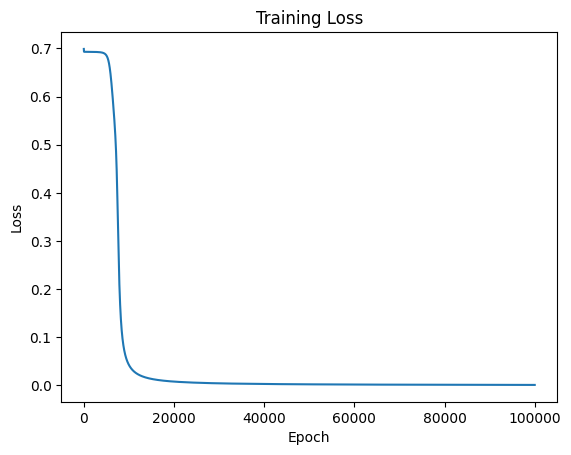

In [ ]:
# Loss 시각화
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
# 모델 테스트
with torch.no_grad():
    test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predicted = model(test)
    print(predicted)

tensor([[9.6270e-04],
        [9.9867e-01],
        [9.9910e-01],
        [8.4156e-04]])


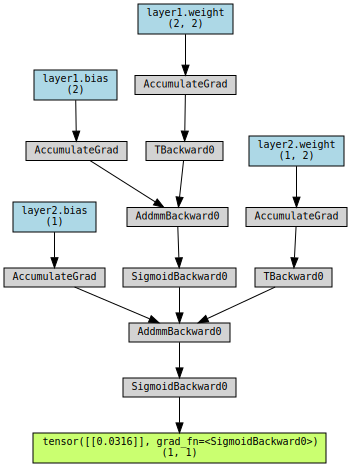

In [ ]:
x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y: y})